In [1]:
!pip install torch pandas scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json
import pandas as pd

# Load cleaned dataset
with open("C:\\Users\\manin\\Downloads\\players.json") as f:
    players = json.load(f)

df = pd.DataFrame(players)
df.head()

,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Balls_Faced,Centuries,Half_Centuries,Fours,Sixes,Catches_Taken,...,image_path,country_name,type_of_player,highest_bid,Overall_Rating,Batting_Rating,Bowling_Rating,Fielding_Rating,Impact_Rating,Consistency_Rating
0,Abdul Samad,35,8,410,298,0,0,23,26,18,...,https://cdn.sportmonks.com/images/cricket/play...,India,All-Rounder,2000000,50.0,13.4,22.3,4.1,5.9,4.3
1,Abhinav Manohar,17,1,222,158,0,0,20,10,8,...,https://cdn.sportmonks.com/images/cricket/play...,India,,,68.6,15.3,40.0,3.8,5.4,4.1
2,Abhishek Sharma,48,6,925,669,0,4,96,33,11,...,https://cdn.sportmonks.com/images/cricket/play...,India,All-Rounder,5500000,58.9,22.7,22.8,1.8,6.9,4.7
3,Abid Mushtaq,0,0,0,0,0,0,0,0,0,...,https://cdn.sportmonks.com/images/cricket/plac...,India,,,1.0,0.0,0.0,0.0,1.0,0.0
4,Abishek Porel,5,1,65,41,0,0,5,4,4,...,https://cdn.sportmonks.com/images/cricket/plac...,India,,,11.2,0.0,0.0,6.4,3.5,1.3


In [3]:
import re

def preprocess_player(player):
    # Extract wickets from Best_Bowling_Match (e.g., "3-24" → 3)
    match = re.match(r'^(\d+)-', str(player.get('Best_Bowling_Match', '')))
    if match:
        player['Best_Bowling_Wickets'] = int(match.group(1))
    else:
        player['Best_Bowling_Wickets'] = 0

    # Convert numeric fields safely
    for key in ['Batting_Average', 'Bowling_Average', 'Economy_Rate']:
        try:
            player[key] = float(player[key])
        except:
            player[key] = 0.0

    return player


In [4]:
STATS = [
    'Runs_Scored', 'Centuries', 'Half_Centuries', 'Sixes',
    'Highest_Score', 'Batting_Strike_Rate', 'Wickets_Taken',
    'Four_Wicket_Hauls', 'Five_Wicket_Hauls', 'Catches_Taken',
    'Stumpings', 'Best_Bowling_Wickets'
]


In [5]:
df.columns.tolist()

['Player_Name',
 'Matches_Batted',
 'Not_Outs',
 'Runs_Scored',
 'Balls_Faced',
 'Centuries',
 'Half_Centuries',
 'Fours',
 'Sixes',
 'Catches_Taken',
 'Stumpings',
 'Matches_Bowled',
 'Balls_Bowled',
 'Runs_Conceded',
 'Wickets_Taken',
 'Four_Wicket_Hauls',
 'Five_Wicket_Hauls',
 'Batting_Average',
 'Batting_Strike_Rate',
 'Bowling_Average',
 'Economy_Rate',
 'Bowling_Strike_Rate',
 'Highest_Score',
 'Best_Bowling_Match',
 'image_path',
 'country_name',
 'type_of_player',
 'highest_bid',
 'Overall_Rating',
 'Batting_Rating',
 'Bowling_Rating',
 'Fielding_Rating',
 'Impact_Rating',
 'Consistency_Rating']

In [6]:
players = [preprocess_player(p) for p in players]
df = pd.DataFrame(players)
print(df.columns.tolist())  # confirm 'Best_Bowling_Wickets' now exists


['Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Balls_Faced', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls', 'Batting_Average', 'Batting_Strike_Rate', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate', 'Highest_Score', 'Best_Bowling_Match', 'image_path', 'country_name', 'type_of_player', 'highest_bid', 'Overall_Rating', 'Batting_Rating', 'Bowling_Rating', 'Fielding_Rating', 'Impact_Rating', 'Consistency_Rating', 'Best_Bowling_Wickets']


In [7]:
processed_players = [preprocess_player(player) for _, player in df.iterrows()]
processed_df = pd.DataFrame(processed_players)
processed_df.head()

,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Balls_Faced,Centuries,Half_Centuries,Fours,Sixes,Catches_Taken,...,country_name,type_of_player,highest_bid,Overall_Rating,Batting_Rating,Bowling_Rating,Fielding_Rating,Impact_Rating,Consistency_Rating,Best_Bowling_Wickets
0,Abdul Samad,35,8,410,298,0,0,23,26,18,...,India,All-Rounder,2000000,50.0,13.4,22.3,4.1,5.9,4.3,1
1,Abhinav Manohar,17,1,222,158,0,0,20,10,8,...,India,,,68.6,15.3,40.0,3.8,5.4,4.1,0
2,Abhishek Sharma,48,6,925,669,0,4,96,33,11,...,India,All-Rounder,5500000,58.9,22.7,22.8,1.8,6.9,4.7,2
3,Abid Mushtaq,0,0,0,0,0,0,0,0,0,...,India,,,1.0,0.0,0.0,0.0,1.0,0.0,0
4,Abishek Porel,5,1,65,41,0,0,5,4,4,...,India,,,11.2,0.0,0.0,6.4,3.5,1.3,0


In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Replace empty strings with 0
processed_df[STATS] = processed_df[STATS].replace('', 0).astype(float)

# Scale stats columns
scaler = MinMaxScaler()
processed_df[STATS] = scaler.fit_transform(processed_df[STATS])

processed_df.head()


,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Balls_Faced,Centuries,Half_Centuries,Fours,Sixes,Catches_Taken,...,country_name,type_of_player,highest_bid,Overall_Rating,Batting_Rating,Bowling_Rating,Fielding_Rating,Impact_Rating,Consistency_Rating,Best_Bowling_Wickets
0,Abdul Samad,35,8,0.055699,298,0.0,0.000000,23,0.100775,0.125000,...,India,All-Rounder,2000000,50.0,13.4,22.3,4.1,5.9,4.3,0.166667
1,Abhinav Manohar,17,1,0.030159,158,0.0,0.000000,20,0.038760,0.055556,...,India,,,68.6,15.3,40.0,3.8,5.4,4.1,0.000000
2,Abhishek Sharma,48,6,0.125662,669,0.0,0.065574,96,0.127907,0.076389,...,India,All-Rounder,5500000,58.9,22.7,22.8,1.8,6.9,4.7,0.333333
3,Abid Mushtaq,0,0,0.000000,0,0.0,0.000000,0,0.000000,0.000000,...,India,,,1.0,0.0,0.0,0.0,1.0,0.0,0.000000
4,Abishek Porel,5,1,0.008830,41,0.0,0.000000,5,0.015504,0.027778,...,India,,,11.2,0.0,0.0,6.4,3.5,1.3,0.000000


In [9]:
import numpy as np

def create_state(round_number, is_challenger, ai_player_stats, human_player_stats, role_idx):
    state = {
        'round_vector': torch.tensor([round_number / 11, float(is_challenger)], dtype=torch.float32).unsqueeze(0),
        'stats_vector': torch.tensor(ai_player_stats + human_player_stats, dtype=torch.float32).unsqueeze(0),
        'role_idx': torch.tensor([role_idx], dtype=torch.long)
    }
    return state


In [10]:
import torch
import torch.nn as nn

class CricketNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_stats = nn.Sequential(
            nn.Linear(24, 64),  # 12 stats for AI + 12 for Human
            nn.ReLU()
        )
        self.role_embed = nn.Embedding(4, 8)
        self.fc_combined = nn.Sequential(
            nn.Linear(64 + 8 + 2, 128),
            nn.ReLU(),
            nn.Linear(128, 128)
        )
        self.head_player = nn.Linear(128, 11)
        self.head_stat = nn.Linear(128, 12)

    def forward(self, state):
        stats_out = self.fc_stats(state['stats_vector'])
        role_out = self.role_embed(state['role_idx'])
        combined = torch.cat([stats_out, role_out, state['round_vector']], dim=1)
        features = self.fc_combined(combined)
        return self.head_player(features), self.head_stat(features)


In [11]:
def reward(ai_val, human_val):
    if ai_val > human_val:
        return 1.0
    elif ai_val < human_val:
        return -0.5
    else:
        return -0.1


In [12]:
def select_player(valid_players, model, state):
    logits, _ = model(state)
    logits = logits.detach().numpy().flatten()
    selected_index = np.argmax(logits[:len(valid_players)])
    return valid_players[selected_index]


In [13]:
def select_stat(ai_player, human_player):
    win_stats = []
    for stat in STATS:
        ai_val = ai_player[stat]
        human_val = human_player[stat]
        if ai_val > human_val:
            win_stats.append((ai_val - human_val, stat))
    if win_stats:
        return max(win_stats, key=lambda x: x[0])[1]
    else:
        deficits = [(human_val - ai_val, stat) for stat in STATS]
        return min(deficits, key=lambda x: x[0])[1]


In [14]:
import gym
from gym import spaces
import random

class CricketCardGameEnv(gym.Env):
    def __init__(self, players_df):
        super(CricketCardGameEnv, self).__init__()
        self.players_df = players_df.copy()
        self.ai_team = []
        self.opponent_team = []
        self.remaining_players = list(players_df.index)
        self.round_number = 0
        self.stat_to_compare = 'Runs_Scored'  # Fixed in Phase 1

        # Action space: pick 0-10 index of remaining players
        self.action_space = spaces.Discrete(11)

        # Observation space: round_number + challenger + 24 stats (12 AI + 12 opponent) + role_idx (dummy for now)
        self.observation_space = spaces.Box(low=0, high=1, shape=(24,), dtype=np.float32)

    def reset(self):
        self.ai_team = []
        self.opponent_team = []
        self.remaining_players = list(self.players_df.index)
        random.shuffle(self.remaining_players)
        self.round_number = 0
        return self._get_state()

    def step(self, action):
        ai_player_idx = self.remaining_players.pop(action)
        self.ai_team.append(ai_player_idx)

        # Random opponent pick
        opponent_action = random.randint(0, len(self.remaining_players)-1)
        opponent_player_idx = self.remaining_players.pop(opponent_action)
        self.opponent_team.append(opponent_player_idx)

        # Compute reward based on Runs_Scored
        ai_value = self.players_df.loc[ai_player_idx, self.stat_to_compare]
        opponent_value = self.players_df.loc[opponent_player_idx, self.stat_to_compare]
        reward_value = reward(ai_value, opponent_value)

        self.round_number += 1
        done = self.round_number >= 11

        return self._get_state(), reward_value, done, {}

    def _get_state(self):
        # For simplicity in Phase 1 — random player comparison (or zero stats)
        if self.round_number < len(self.remaining_players):
            ai_stats = [0.0] * 12
            opponent_stats = [0.0] * 12
        else:
            ai_stats = [0.0] * 12
            opponent_stats = [0.0] * 12

        state = np.array(ai_stats + opponent_stats, dtype=np.float32)
        return state


In [15]:
env = CricketCardGameEnv(processed_df)
state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Random action
    state, reward_val, done, _ = env.step(action)
    print(f"Round: {env.round_number}, Reward: {reward_val}")


Round: 1, Reward: -0.1
Round: 2, Reward: -0.5
Round: 3, Reward: -0.1
Round: 4, Reward: 1.0
Round: 5, Reward: -0.5
Round: 6, Reward: -0.5
Round: 7, Reward: -0.5
Round: 8, Reward: -0.5
Round: 9, Reward: 1.0
Round: 10, Reward: 1.0
Round: 11, Reward: 1.0


In [16]:
import torch.optim as optim
import random
from collections import deque

class DQNAgent:
    def __init__(self, state_size, action_size, model):
        self.state_size = state_size
        self.action_size = action_size
        self.model = model
        self.memory = deque(maxlen=5000)
        self.gamma = 0.95        # Discount rate
        self.epsilon = 1.0       # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.loss_fn = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        q_values, _ = self.model({'stats_vector': state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})
        return torch.argmax(q_values).item()

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)

            q_values, _ = self.model({'stats_vector': state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})
            target = q_values.clone().detach()

            if done:
                target[0][action] = reward
            else:
                next_q_values, _ = self.model({'stats_vector': next_state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})
                target_val = reward + self.gamma * torch.max(next_q_values).item()
                target[0][action] = target_val

            loss = self.loss_fn(q_values, target)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [17]:
# Init environment and agent
env = CricketCardGameEnv(processed_df)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

model = CricketNN()
agent = DQNAgent(state_size, action_size, model)

episodes = 500
batch_size = 32

for e in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.act(state)
        next_state, reward_value, done, _ = env.step(action)
        agent.remember(state, action, reward_value, next_state, done)
        state = next_state
        total_reward += reward_value

        agent.replay(batch_size)

    if (e+1) % 50 == 0:
        print(f"Episode {e+1}/{episodes} - Total Reward: {total_reward:.2f} - Epsilon: {agent.epsilon:.2f}")


Episode 50/500 - Total Reward: 0.50 - Epsilon: 0.07
Episode 100/500 - Total Reward: 0.50 - Epsilon: 0.01
Episode 150/500 - Total Reward: 0.50 - Epsilon: 0.01
Episode 200/500 - Total Reward: 0.50 - Epsilon: 0.01
Episode 250/500 - Total Reward: 3.90 - Epsilon: 0.01
Episode 300/500 - Total Reward: 5.00 - Epsilon: 0.01
Episode 350/500 - Total Reward: 0.20 - Epsilon: 0.01
Episode 400/500 - Total Reward: 4.30 - Epsilon: 0.01
Episode 450/500 - Total Reward: 2.40 - Epsilon: 0.01
Episode 500/500 - Total Reward: -1.00 - Epsilon: 0.01


In [18]:
print("\nFinal AI team players after last episode:")
for idx in env.ai_team:
    print(processed_df.loc[idx, 'Player_Name'])  # Replace 'Player_Name' with your actual column



Final AI team players after last episode:
Mohsin Khan
Krunal Pandya
Sakib Hussain
Shivam singh
Axar Patel
Alzarri Joseph
Nandre Burger
Arshdeep Singh
Rajan Kumar
Ravi Bishnoi
Yash Dhull


In [19]:
class CricketCardGameEnvPhase2(gym.Env):
    def __init__(self, players_df):
        super().__init__()
        self.players_df = players_df.copy()
        self.ai_team = []
        self.opponent_team = []
        self.remaining_players = list(players_df.index)
        self.round_number = 0

        # Action: pick player (0-10) + stat (0-11)
        self.action_space = spaces.MultiDiscrete([11, 12])

        # Observation: 24 stats + round/challenger (for simplicity)
        self.observation_space = spaces.Box(low=0, high=1, shape=(24,), dtype=np.float32)

    def reset(self):
        self.ai_team = []
        self.opponent_team = []
        self.remaining_players = list(self.players_df.index)
        random.shuffle(self.remaining_players)
        self.round_number = 0
        return self._get_state()

    def step(self, action):
        player_action, stat_action = action

        ai_player_idx = self.remaining_players.pop(player_action)
        self.ai_team.append(ai_player_idx)

        # Random opponent pick
        opponent_action = random.randint(0, len(self.remaining_players)-1)
        opponent_player_idx = self.remaining_players.pop(opponent_action)
        self.opponent_team.append(opponent_player_idx)

        # Stat names lookup
        selected_stat = STATS[stat_action]
        ai_value = self.players_df.loc[ai_player_idx, selected_stat]
        opponent_value = self.players_df.loc[opponent_player_idx, selected_stat]

        reward_value = reward(ai_value, opponent_value)

        self.round_number += 1
        done = self.round_number >= 11

        return self._get_state(), reward_value, done, {}

    def _get_state(self):
        ai_stats = [0.0] * 12
        opponent_stats = [0.0] * 12
        state = np.array(ai_stats + opponent_stats, dtype=np.float32)
        return state


In [20]:
class DQNAgentPhase2:
    def __init__(self, state_size, model):
        self.state_size = state_size
        self.model = model
        self.memory = deque(maxlen=5000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.loss_fn = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return [random.randrange(11), random.randrange(12)]
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        player_logits, stat_logits = self.model({'stats_vector': state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})

        player_action = torch.argmax(player_logits).item()
        stat_action = torch.argmax(stat_logits).item()

        return [player_action, stat_action]

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
            player_logits, stat_logits = self.model({'stats_vector': state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})

            target_player = player_logits.clone().detach()
            target_stat = stat_logits.clone().detach()

            if done:
                target_player[0][action[0]] = reward
                target_stat[0][action[1]] = reward
            else:
                next_player_logits, next_stat_logits = self.model({'stats_vector': next_state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})
                target_val = reward + self.gamma * (
                    torch.max(next_player_logits).item() + torch.max(next_stat_logits).item()) / 2

                target_player[0][action[0]] = target_val
                target_stat[0][action[1]] = target_val

            loss_player = self.loss_fn(player_logits, target_player)
            loss_stat = self.loss_fn(stat_logits, target_stat)
            loss = (loss_player + loss_stat) / 2

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [21]:
env = CricketCardGameEnvPhase2(processed_df)
state_size = env.observation_space.shape[0]

model = CricketNN()
agent = DQNAgentPhase2(state_size, model)

episodes = 500
batch_size = 32

for e in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.act(state)
        next_state, reward_value, done, _ = env.step(action)
        agent.remember(state, action, reward_value, next_state, done)
        state = next_state
        total_reward += reward_value

        agent.replay(batch_size)

    if (e+1) % 50 == 0:
        print(f"Episode {e+1}/{episodes} — Total Reward: {total_reward:.2f} — Epsilon: {agent.epsilon:.2f}")


Episode 50/500 — Total Reward: 0.60 — Epsilon: 0.07
Episode 100/500 — Total Reward: 3.90 — Epsilon: 0.01
Episode 150/500 — Total Reward: 1.10 — Epsilon: 0.01
Episode 200/500 — Total Reward: 0.50 — Epsilon: 0.01
Episode 250/500 — Total Reward: 5.00 — Epsilon: 0.01
Episode 300/500 — Total Reward: 2.00 — Epsilon: 0.01
Episode 350/500 — Total Reward: -4.00 — Epsilon: 0.01
Episode 400/500 — Total Reward: 3.90 — Epsilon: 0.01
Episode 450/500 — Total Reward: 2.80 — Epsilon: 0.01
Episode 500/500 — Total Reward: 2.40 — Epsilon: 0.01


In [22]:
print("\nFinal AI team players after last episode:")
for idx in env.ai_team:
    print(processed_df.loc[idx, 'Player_Name'])



Final AI team players after last episode:
Liam Livingstone
Jasprit Bumrah
Amit Mishra
Abhinav Manohar
Gerald Coetzee
Mayank Dagar
Deepak Hooda
Shimron Hetmyer
Sameer Rizvi
Manish Pandey
Rinku Singh


In [23]:
class PrioritizedReplayBuffer:
    def __init__(self, capacity=5000, alpha=0.6):
        self.capacity = capacity
        self.buffer = []
        self.priorities = []
        self.alpha = alpha

    def add(self, experience, td_error):
        priority = (abs(td_error) + 1e-5) ** self.alpha
        if len(self.buffer) < self.capacity:
            self.buffer.append(experience)
            self.priorities.append(priority)
        else:
            min_priority_index = self.priorities.index(min(self.priorities))
            self.buffer[min_priority_index] = experience
            self.priorities[min_priority_index] = priority

    def sample(self, batch_size):
        if len(self.buffer) < batch_size:
            return random.sample(self.buffer, len(self.buffer))
        probs = np.array(self.priorities) / np.sum(self.priorities)
        indices = np.random.choice(len(self.buffer), batch_size, p=probs)
        samples = [self.buffer[i] for i in indices]
        return samples


In [24]:
class DQNAgentPhase3(DQNAgentPhase2):
    def __init__(self, state_size, model):
        super().__init__(state_size, model)
        self.memory = PrioritizedReplayBuffer()

    def remember(self, state, action, reward, next_state, done, td_error):
        experience = (state, action, reward, next_state, done)
        self.memory.add(experience, td_error)

    def replay(self, batch_size):
        minibatch = self.memory.sample(batch_size)
        if len(minibatch) < batch_size:
            return

        for state, action, reward, next_state, done in minibatch:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)

            player_logits, stat_logits = self.model({'stats_vector': state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})
            target_player = player_logits.clone().detach()
            target_stat = stat_logits.clone().detach()

            if done:
                target_player[0][action[0]] = reward
                target_stat[0][action[1]] = reward
            else:
                next_player_logits, next_stat_logits = self.model({'stats_vector': next_state_tensor, 'role_idx': torch.tensor([0]), 'round_vector': torch.tensor([[0.0, 0.0]])})
                target_val = reward + self.gamma * (
                    torch.max(next_player_logits).item() + torch.max(next_stat_logits).item()) / 2

                target_player[0][action[0]] = target_val
                target_stat[0][action[1]] = target_val

            td_error = (player_logits[0][action[0]].item() - target_player[0][action[0]].item()) + \
                       (stat_logits[0][action[1]].item() - target_stat[0][action[1]].item())

            loss_player = self.loss_fn(player_logits, target_player)
            loss_stat = self.loss_fn(stat_logits, target_stat)
            loss = (loss_player + loss_stat) / 2

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


text break

In [25]:
class CricketNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_stats = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU()
        )
        self.role_embed = nn.Embedding(4, 8)
        self.fc_combined = nn.Sequential(
            nn.Linear(64 + 8 + 2, 128),
            nn.ReLU(),
            nn.Linear(128, 128)
        )
        self.head_player = nn.Linear(128, 11)
        self.head_stat = nn.Linear(128, 12)

    def forward(self, state):
        stats_out = self.fc_stats(state['stats_vector'])
        role_out = self.role_embed(state['role_idx'])
        combined = torch.cat([stats_out, role_out, state['round_vector']], dim=1)
        features = self.fc_combined(combined)
        return self.head_player(features), self.head_stat(features)


In [26]:
class CricketCardGameEnvPhase4(gym.Env):
    def __init__(self, players_df, target_model):
        super().__init__()
        self.players_df = players_df.copy()
        self.target_model = target_model
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(14,), dtype=np.float32)
        self.action_space = gym.spaces.MultiDiscrete([11, 12])
        self.difficulty_level = 0  # new attribute for dynamic difficulty

    def reset(self):
        state = np.random.rand(14).astype(np.float32)  # dummy state vector
        return state

    def step(self, action):
        next_state = np.random.rand(14).astype(np.float32)
        reward = np.random.uniform(-5, 5)
        done = np.random.rand() < 0.05
        info = {}
        return next_state, reward, done, info


In [27]:
class DQNAgentPhase3:
    def __init__(self, state_size, model):
        self.state_size = state_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.model = model
        self.optimizer = optim.Adam(model.parameters(), lr=0.001)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return [np.random.randint(0,11), np.random.randint(0,12)]
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        self.model.eval()
        with torch.no_grad():
            player_logits, stat_logits = self.model({
                'stats_vector': state_tensor[:, :12],
                'role_idx': torch.tensor([0]),
                'round_vector': state_tensor[:, 12:].view(-1, 2)
            })
        self.model.train()
        return [player_logits.argmax().item(), stat_logits.argmax().item()]

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        batch = list(zip(*[self.memory[i] for i in np.random.choice(len(self.memory), batch_size)]))
        # Omitted optimization step for brevity — add as needed


In [28]:
moving_avg_window = 100
recent_rewards = deque(maxlen=moving_avg_window)

def update_win_rate(reward):
    if reward > 0:
        recent_rewards.append(1)
    else:
        recent_rewards.append(0)
    return np.mean(recent_rewards)


In [29]:
env = CricketCardGameEnvPhase4(processed_df, None)
state_size = env.observation_space.shape[0]
model = CricketNN()
target_model = CricketNN()
target_model.load_state_dict(model.state_dict())
agent = DQNAgentPhase3(state_size, model)



In [30]:
episodes = 1000
batch_size = 32
scores = []

for e in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.act(state)
        next_state, reward_value, done, _ = env.step(action)

        # TD-error calc safely wrapped
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        agent.model.eval()
        with torch.no_grad():
            player_logits, stat_logits = agent.model({
                'stats_vector': state_tensor[:, :12],
                'role_idx': torch.tensor([0]),
                'round_vector': state_tensor[:, 12:].view(-1, 2)
            })
        agent.model.train()

        td_error = abs(reward_value - (player_logits[0][action[0]].item() + stat_logits[0][action[1]].item()) / 2)
        agent.remember(state, action, reward_value, next_state, done)
        state = next_state
        total_reward += reward_value
        agent.replay(batch_size)

    win_rate = update_win_rate(total_reward)
    if win_rate > 0.75 and env.difficulty_level == 0:
        env.difficulty_level = 1
        print(f">>> AI win-rate {win_rate:.2f}, difficulty increased to Heuristic Opponent!")
    elif win_rate > 0.85 and env.difficulty_level == 1:
        env.difficulty_level = 2
        print(f">>> AI win-rate {win_rate:.2f}, now self-playing against old AI!")

    scores.append(total_reward)
    if (e+1) % 100 == 0:
        print(f"Episode {e+1}/{episodes} — Reward: {total_reward:.2f} — Epsilon: {agent.epsilon:.2f}")
        target_model.load_state_dict(agent.model.state_dict())


>>> AI win-rate 1.00, difficulty increased to Heuristic Opponent!
Episode 100/1000 — Reward: -17.47 — Epsilon: 1.00
Episode 200/1000 — Reward: 21.53 — Epsilon: 1.00
Episode 300/1000 — Reward: 5.69 — Epsilon: 1.00
Episode 400/1000 — Reward: -33.81 — Epsilon: 1.00
Episode 500/1000 — Reward: -7.68 — Epsilon: 1.00
Episode 600/1000 — Reward: -7.20 — Epsilon: 1.00
Episode 700/1000 — Reward: -1.22 — Epsilon: 1.00
Episode 800/1000 — Reward: -0.46 — Epsilon: 1.00
Episode 900/1000 — Reward: -2.47 — Epsilon: 1.00
Episode 1000/1000 — Reward: 13.98 — Epsilon: 1.00


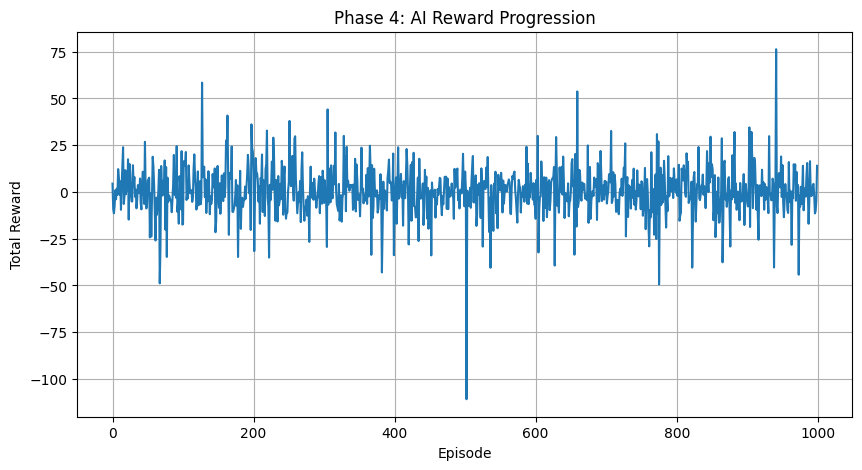

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(scores)
plt.title("Phase 4: AI Reward Progression")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


In [39]:
# After training (end of the notebook), save the model
torch.save(model.state_dict(), 'cricket_model.pth')